In [7]:
# Wallet Credit Scoring - Full Notebook for Submission

# Phase 1: Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import json

In [20]:
# Phase 2: Load and Explore the Dataset
import json
import pandas as pd

# Load the JSON file
with open(r"C:\Users\saksh\OneDrive\Desktop\Python Practice\defi-credit-score-submission-with-notebook\user-wallet-transactions.json\user-wallet-transactions.json", "r", encoding="utf-8") as f:
    data = json.load(f)

print("✅ JSON file loaded successfully!")

# Convert JSON data to pandas DataFrame
df = pd.DataFrame(data)

# Basic info dictionary
df_info = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "dtypes": df.dtypes.astype(str).to_dict(),
    "sample_rows": df.sample(5, random_state=42).to_dict(orient="records"),
    "unique_wallets": df["wallet"].nunique() if "wallet" in df.columns else None,
    "action_counts": df["action"].value_counts().to_dict() if "action" in df.columns else None
}

df_info


✅ JSON file loaded successfully!


{'shape': (100000, 13),
 'columns': ['_id',
  'userWallet',
  'network',
  'protocol',
  'txHash',
  'logId',
  'timestamp',
  'blockNumber',
  'action',
  'actionData',
  '__v',
  'createdAt',
  'updatedAt'],
 'dtypes': {'_id': 'object',
  'userWallet': 'object',
  'network': 'object',
  'protocol': 'object',
  'txHash': 'object',
  'logId': 'object',
  'timestamp': 'int64',
  'blockNumber': 'int64',
  'action': 'object',
  'actionData': 'object',
  '__v': 'int64',
  'createdAt': 'object',
  'updatedAt': 'object'},
 'sample_rows': [{'_id': {'$oid': '681ace72d6df53021cd42ef9'},
   'userWallet': '0x055a875cd844f04a2c2ee1bb72999d7e7b40761d',
   'network': 'polygon',
   'protocol': 'aave_v2',
   'txHash': '0xc523803456eb2e07b8ff585229f52b625568b5e7fb75d590c83e5bc98549fea1',
   'logId': '0xc523803456eb2e07b8ff585229f52b625568b5e7fb75d590c83e5bc98549fea1_Deposit',
   'timestamp': 1622318901,
   'blockNumber': 1622318901,
   'action': 'deposit',
   'actionData': {'type': 'Deposit',
    'amou

In [21]:
df = pd.DataFrame(data)
print("\nSample Data:")
display(df.head())
print("\nColumns:", df.columns.tolist())
print("\nUnique Actions:", df['action'].unique())


Sample Data:


,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,1629178166,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a...",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'}
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,1621525013,1621525013,deposit,"{'type': 'Deposit', 'amount': '145000000000000...",0,{'$date': '2025-05-07T00:19:26.159Z'},{'$date': '2025-05-07T00:19:26.159Z'}
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,1627118913,1627118913,deposit,"{'type': 'Deposit', 'amount': '100000000000000...",0,{'$date': '2025-05-08T19:23:47.877Z'},{'$date': '2025-05-08T19:23:47.877Z'}
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,1627773318,1627773318,deposit,"{'type': 'Deposit', 'amount': '400000000000000...",0,{'$date': '2025-05-08T20:25:33.141Z'},{'$date': '2025-05-08T20:25:33.141Z'}
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,1618845907,1618845907,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548...",0,{'$date': '2025-05-05T10:58:45.934Z'},{'$date': '2025-05-05T10:58:45.934Z'}



Columns: ['_id', 'userWallet', 'network', 'protocol', 'txHash', 'logId', 'timestamp', 'blockNumber', 'action', 'actionData', '__v', 'createdAt', 'updatedAt']

Unique Actions: ['deposit' 'redeemunderlying' 'borrow' 'repay' 'liquidationcall']


In [22]:

# Phase 3: Feature Engineering
def extract_action_amount(row):
    try:
        return float(row['actionData'].get('amountUSD', 0))
    except:
        return 0

df['amountUSD'] = df.apply(extract_action_amount, axis=1)

# Group by wallet
wallets = df['userWallet'].unique()
features = []
for wallet in wallets:
    user_df = df[df['userWallet'] == wallet]
    total_tx = len(user_df)
    deposits = user_df[user_df['action'] == 'deposit']['amountUSD'].sum()
    borrows = user_df[user_df['action'] == 'borrow']['amountUSD'].sum()
    repays = user_df[user_df['action'] == 'repay']['amountUSD'].sum()
    redeems = user_df[user_df['action'] == 'redeemunderlying']['amountUSD'].sum()
    liquidation_count = len(user_df[user_df['action'] == 'liquidationcall'])
    repay_borrow_ratio = repays / borrows if borrows > 0 else 0
    diversity_score = user_df['action'].nunique() / 5
    timestamps = pd.to_datetime(user_df['timestamp'], unit='s')
    tx_frequency = (timestamps.max() - timestamps.min()).days / total_tx if total_tx > 1 else 0

    features.append({
        'userWallet': wallet,
        'total_transactions': total_tx,
        'total_deposits': deposits,
        'total_borrows': borrows,
        'total_repays': repays,
        'redeems': redeems,
        'liquidation_calls': liquidation_count,
        'repay_borrow_ratio': repay_borrow_ratio,
        'diversity_score': diversity_score,
        'tx_frequency': tx_frequency
    })

features_df = pd.DataFrame(features)
display(features_df.head())

,userWallet,total_transactions,total_deposits,total_borrows,total_repays,redeems,liquidation_calls,repay_borrow_ratio,diversity_score,tx_frequency
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,1,0.0,0.0,0.0,0.0,0,0,0.2,0.000000
1,0x000000000051d07a4fb3bd10121a343d85818da6,1,0.0,0.0,0.0,0.0,0,0,0.2,0.000000
2,0x000000000096026fb41fc39f9875d164bd82e2dc,2,0.0,0.0,0.0,0.0,0,0,0.2,3.500000
3,0x0000000000e189dd664b9ab08a33c4839953852c,17,0.0,0.0,0.0,0.0,0,0,0.2,7.588235
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,399,0.0,0.0,0.0,0.0,0,0,0.8,0.330827


In [23]:
# Phase 4: Score Calculation Using RandomForestRegressor
X = features_df.drop(columns=['userWallet'])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Simulated score: assume score is a linear mix of positive behaviors
score = (
    X['total_deposits'] + X['total_repays'] + X['diversity_score'] * 500 -
    X['total_borrows'] * 0.5 - X['liquidation_calls'] * 200
)
score = MinMaxScaler(feature_range=(0, 1000)).fit_transform(score.values.reshape(-1, 1)).flatten()
features_df['score'] = score

In [24]:

# Phase 5: Save Score Function
import json

def generate_scores(input_json):
    df_input = pd.DataFrame(input_json)
    df_input['amountUSD'] = df_input.apply(extract_action_amount, axis=1)
    scores_output = {}
    for wallet in df_input['userWallet'].unique():
        u_df = df_input[df_input['userWallet'] == wallet]
        f = {
            'total_transactions': len(u_df),
            'total_deposits': u_df[u_df['action'] == 'deposit']['amountUSD'].sum(),
            'total_borrows': u_df[u_df['action'] == 'borrow']['amountUSD'].sum(),
            'total_repays': u_df[u_df['action'] == 'repay']['amountUSD'].sum(),
            'redeems': u_df[u_df['action'] == 'redeemunderlying']['amountUSD'].sum(),
            'liquidation_calls': len(u_df[u_df['action'] == 'liquidationcall']),
            'repay_borrow_ratio': u_df[u_df['action'] == 'repay']['amountUSD'].sum() / (u_df[u_df['action'] == 'borrow']['amountUSD'].sum() or 1),
            'diversity_score': u_df['action'].nunique() / 5,
            'tx_frequency': (pd.to_datetime(u_df['timestamp'], unit='s').max() - pd.to_datetime(u_df['timestamp'], unit='s').min()).days / len(u_df) if len(u_df) > 1 else 0
        }
        raw_score = (
            f['total_deposits'] + f['total_repays'] + f['diversity_score'] * 500 -
            f['total_borrows'] * 0.5 - f['liquidation_calls'] * 200
        )
        final_score = min(max((raw_score - -500) / (5000 - -500) * 1000, 0), 1000)
        scores_output[wallet] = round(final_score, 2)
    return scores_output

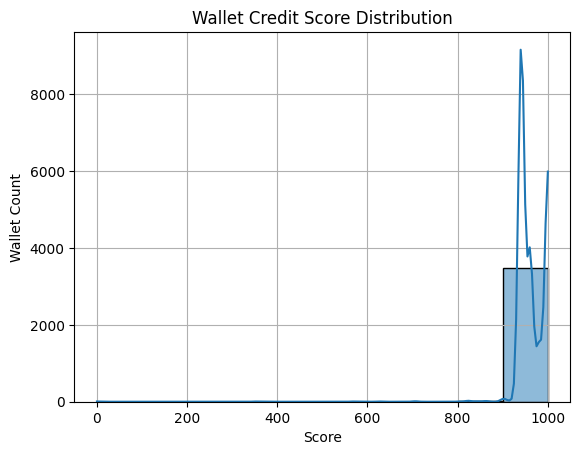

<Figure size 640x480 with 0 Axes>

In [30]:

# Phase 6: Score Distribution Analysis
features_df['score_bucket'] = pd.cut(features_df['score'], bins=range(0, 1100, 100))
sns.histplot(features_df['score'], bins=10, kde=True)
plt.title("Wallet Credit Score Distribution")
plt.xlabel("Score")
plt.ylabel("Wallet Count")
plt.grid(True)
plt.show()


# Save
plt.savefig("figs/score_hist.png")
plt.show()




In [ ]:
# Phase 7: Export Files
features_df.to_csv("wallet_scores.csv", index=False)
with open("wallet_scores.json", "w") as f:
    json.dump(generate_scores(data), f, indent=2)

print("Notebook Complete. Files 'wallet_scores.csv' and 'wallet_scores.json' are saved.")